In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../working"))
print(os.listdir("../input/cats-and-dogs-small/cats_and_dogs_small/cats_and_dogs_small/train"))
print(os.listdir("../input/dogs-vs-cats"))
# Any results you write to the current directory are saved as output.

['__notebook_source__.ipynb', 'cats_and_dogs_small_1.h5', '.ipynb_checkpoints', 'cats_and_dogs_small_2.h5', 'submission.csv']
['cats', 'dogs']
['train', 'sampleSubmission.csv', 'test1']


In [3]:
# Marking the necessary directories 
train_dir = "../input/cats-and-dogs-small/cats_and_dogs_small/cats_and_dogs_small/train"
train_cats_dir = os.path.join(train_dir, 'cats')

validation_dir = "../input/cats-and-dogs-small/cats_and_dogs_small/cats_and_dogs_small/validation"
test_dir = "../input/cats-and-dogs-small/cats_and_dogs_small/cats_and_dogs_small/test"

In [4]:
# model_1
from keras.models import Sequential
from keras import layers

model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Using TensorFlow backend.


In [5]:
# configuring model_1 for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [7]:
"""
Data preprocessing : using ImageDataGenerator to turn image files on disk into 
batches of preprocessed tensors.
Note that the generator yields these batches indefinitely:
it loops endlessly over the images in the target folder
"""
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# checking the shape of train_generator
for data_batch, label_batch in train_generator:
    print('data batch shape : ', data_batch.shape)
    print('label batch shape : ', label_batch.shape)
    break

data batch shape :  (20, 150, 150, 3)
label batch shape :  (20,)


In [9]:
#  Fitting the model_1 using a batch generator
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 17s 169ms/step - loss: 0.6879 - acc: 0.5370 - val_loss: 0.6871 - val_acc: 0.5300
Epoch 2/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6602 - acc: 0.6055 - val_loss: 0.6387 - val_acc: 0.6390
Epoch 3/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6294 - acc: 0.6315 - val_loss: 0.6185 - val_acc: 0.6500
Epoch 4/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5827 - acc: 0.6885 - val_loss: 0.6023 - val_acc: 0.6550
Epoch 5/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5462 - acc: 0.7250 - val_loss: 0.5739 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5169 - acc: 0.7390 - val_loss: 0.5670 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 11s 110ms/step - loss: 0.4924 - acc: 0.7630 - val_loss: 0.5748 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 1

In [10]:
# saving model_1
model.save('cats_and_dogs_small_1.h5')

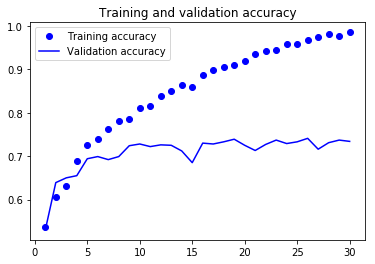

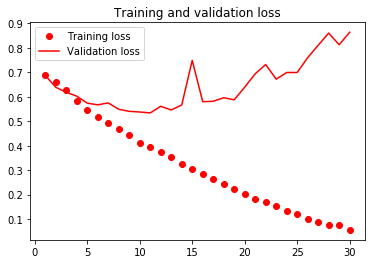

In [11]:
# Displaying curves of loss and accuracy during training of model_1
import matplotlib.pyplot as plt

acc =  history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend()
plt.show()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

In [12]:
"""
validation accuracy stalls at ~72%, now using 'data augmentation'
Setting up a data augmentation configuration via ImageDataGenerator
"""
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')


(1, 150, 150, 3)


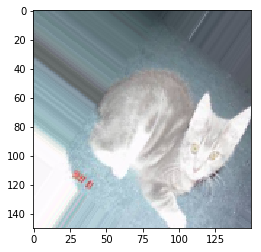

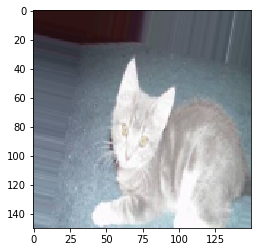

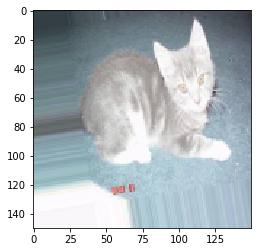

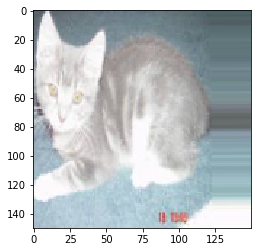

In [13]:
# checking ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

fname = [os.path.join(train_cats_dir, fname) for 
         fname in os.listdir(train_cats_dir)]

img_path = fname[79]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
print(x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

In [14]:
# model_2 that includes dropout
from keras.models import Sequential
from keras import layers

model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [16]:
# configuring model_2 for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [21]:
# Training the model_2 using data-augmentation generators
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 35s 348ms/step - loss: 0.6862 - acc: 0.5434 - val_loss: 0.7909 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 32s 316ms/step - loss: 0.6744 - acc: 0.5566 - val_loss: 0.6518 - val_acc: 0.5767
Epoch 3/100
100/100 [==============================] - 32s 317ms/step - loss: 0.6600 - acc: 0.5866 - val_loss: 0.6657 - val_acc: 0.5825
Epoch 4/100
100/100 [==============================] - 32s 315ms/step - loss: 0.6390 - acc: 0.6263 - val_loss: 0.6150 - val_acc: 0.6559
Epoch 5/100
100/100 [==============================] - 31s 305ms/step - loss: 0.6152 - acc: 0.6553 - val_loss: 0.6563 - val_acc: 0.6244
Epoch 6/100
100/100 [==============================] - 34s 342ms/step - loss: 0.6013 - acc: 0.6753 - val_loss: 0.6012 - val_acc: 0.6701
Epoch 7/100
100/100 [==============================] - 32s 319ms/step - loss: 0.5944 - acc: 0.6741 -

In [22]:
# saving model_2
model.save('cats_and_dogs_small_2.h5')

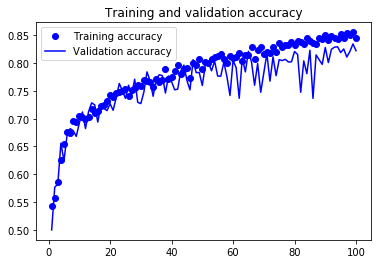

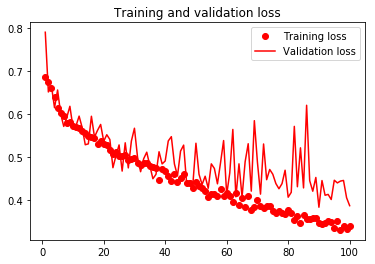

In [23]:
# Displaying curves of loss and accuracy during training of model_2
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'bo', label='Training accuracy')
plt.plot(epoch, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend()
plt.show()

plt.plot(epoch, loss, 'ro', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

In [24]:
"""
Using a pretrained convnet
There are two ways to use a pretrained network: feature extraction and fine-tuning
"""
#  Instantiating the VGG16 convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [25]:
# summary of VGG16
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [36]:
"""
FAST FEATURE EXTRACTION WITHOUT DATA AUGMENTATION
"""
#  Extracting features using the pretrained convolutional base
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [41]:
# Defining and training the densely connected classifier model_3
from keras import models, layers, optimizers

model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 628us/step - loss: 0.6115 - acc: 0.6655 - val_loss: 0.4626 - val_acc: 0.8160
Epoch 2/30
2000/2000 [==============================] - 1s 377us/step - loss: 0.4363 - acc: 0.8145 - val_loss: 0.3776 - val_acc: 0.8550
Epoch 3/30
2000/2000 [==============================] - 1s 376us/step - loss: 0.3671 - acc: 0.8370 - val_loss: 0.3396 - val_acc: 0.8650
Epoch 4/30
2000/2000 [==============================] - 1s 366us/step - loss: 0.3269 - acc: 0.8695 - val_loss: 0.3079 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 1s 375us/step - loss: 0.2918 - acc: 0.8825 - val_loss: 0.2921 - val_acc: 0.8910
Epoch 6/30
2000/2000 [==============================] - 1s 373us/step - loss: 0.2765 - acc: 0.8870 - val_loss: 0.2802 - val_acc: 0.8840
Epoch 7/30
2000/2000 [==============================] - 1s 371us/step - loss: 0.2586 - acc: 0.9060 - val_loss: 0.2691 - val_acc: 0.8930


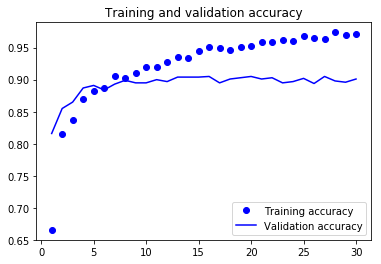

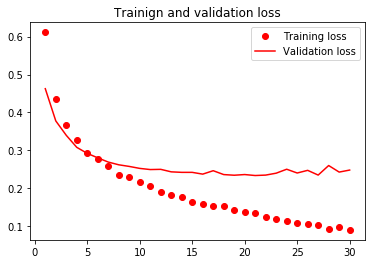

In [42]:
# Displaying curves of loss and accuracy during training of model_3
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'bo', label='Training accuracy')
plt.plot(epoch, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend()
plt.show()

plt.plot(epoch, loss, 'ro', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Trainign and validation loss')

plt.legend()
plt.show()

In [43]:
"""
FEATURE EXTRACTION WITH DATA AUGMENTATION
"""
#  Adding a densely connected classifier on top of the convolutional base model_4
from keras import models, layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
# summary of model_4
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [45]:
# freezing the conv_base network so that weights don't update
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [47]:
# configuring model_4 for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [48]:
#  Training the model_4 end to end with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 27s 274ms/step - loss: 0.5351 - acc: 0.7405 - val_loss: 0.4243 - val_acc: 0.7950
Epoch 2/30
100/100 [==============================] - 26s 257ms/step - loss: 0.4169 - acc: 0.8015 - val_loss: 0.3009 - val_acc: 0.8800
Epoch 3/30
100/100 [==============================] - 26s 256ms/step - loss: 0.3882 - acc: 0.8315 - val_loss: 0.2891 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 26s 255ms/step - loss: 0.3618 - acc: 0.8310 - val_loss: 0.2774 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 26s 256ms/step - loss: 0.3490 - acc: 0.8400 - val_loss: 0.2583 - val_acc: 0.8980
Epoch 6/30
100/100 [==============================] - 26s 257ms/step - loss: 0.3487 - acc: 0.8450 - val_loss: 0.2559 - val_acc: 0.9030
Epoch 7/30
100/100 [==============================] - 26s 262ms/step - loss: 0.3433 - acc: 0.8460 - val_lo

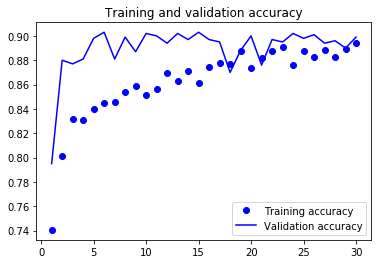

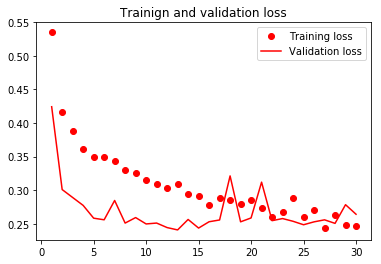

In [49]:
# Displaying curves of loss and accuracy during training of model_4
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'bo', label='Training accuracy')
plt.plot(epoch, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend()
plt.show()

plt.plot(epoch, loss, 'ro', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Trainign and validation loss')

plt.legend()
plt.show()

In [53]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9169999957084656


In [54]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [55]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 30s 302ms/step - loss: 0.1646 - acc: 0.9300 - val_loss: 0.2540 - val_acc: 0.9160
Epoch 2/100
100/100 [==============================] - 28s 278ms/step - loss: 0.1551 - acc: 0.9395 - val_loss: 0.2112 - val_acc: 0.9300
Epoch 3/100
100/100 [==============================] - 28s 277ms/step - loss: 0.1535 - acc: 0.9385 - val_loss: 0.2173 - val_acc: 0.9300
Epoch 4/100
100/100 [==============================] - 28s 275ms/step - loss: 0.1377 - acc: 0.9490 - val_loss: 0.2105 - val_acc: 0.9250
Epoch 5/100
100/100 [==============================] - 28s 277ms/step - loss: 0.1259 - acc: 0.9525 - val_loss: 0.3126 - val_acc: 0.8960
Epoch 6/100
100/100 [==============================] - 27s 274ms/step - loss: 0.1336 - acc: 0.9455 - val_loss: 0.2076 - val_acc: 0.9310
Epoch 7/100
100/100 [==============================] - 28s 276ms/step - loss: 0.1255 - acc: 0.9540 - val_loss: 0.2891 - val_acc: 0.9060
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 28s 275ms/step - loss: 0.0301 - acc: 0.9880 - val_loss: 0.2958 - val_acc: 0.9330
Epoch 62/100
100/100 [==============================] - 27s 274ms/step - loss: 0.0340 - acc: 0.9895 - val_loss: 0.2656 - val_acc: 0.9340
Epoch 63/100
100/100 [==============================] - 27s 274ms/step - loss: 0.0376 - acc: 0.9880 - val_loss: 0.2662 - val_acc: 0.9330
Epoch 64/100
100/100 [==============================] - 27s 274ms/step - loss: 0.0441 - acc: 0.9870 - val_loss: 0.3126 - val_acc: 0.9340
Epoch 65/100
100/100 [==============================] - 28s 276ms/step - loss: 0.0250 - acc: 0.9900 - val_loss: 0.4637 - val_acc: 0.9240
Epoch 66/100
100/100 [==============================] - 28s 275ms/step - loss: 0.0340 - acc: 0.9875 - val_loss: 0.2618 - val_acc: 0.9340
Epoch 67/100
100/100 [==============================] - 28s 275ms/step - loss: 0.0318 - acc: 0.9890 - val_loss: 0.3618 - val_acc: 0.9290
Epoch 68/100
100/100 [===================

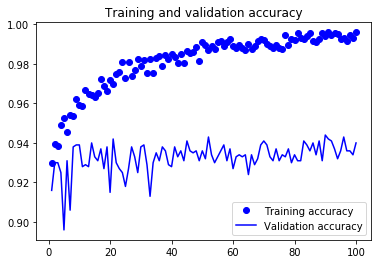

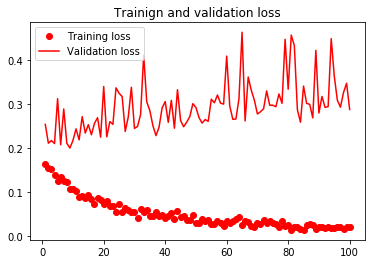

In [57]:
# Displaying curves of loss and accuracy during training of model_5
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.plot(epoch, acc, 'bo', label='Training accuracy')
plt.plot(epoch, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend()
plt.show()

plt.plot(epoch, loss, 'ro', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Trainign and validation loss')

plt.legend()
plt.show()

In [58]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9429999947547912


In [61]:
testing_dir = "../input/dogs-vs-cats/test1"


In [78]:
testing_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=(150, 150),
    batch_size=1,
    shuffle = False,
    class_mode=None)

filenames = testing_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(testing_generator)
predict_class = [1 if pred > 0.5 else 0 for pred in predict]
print(len(predict_class))

Found 12500 images belonging to 1 classes.
12500


In [81]:
#submission = pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')
#submission.to_csv('submission.csv', index=False)
'''
out = open('../input/dogs-vs-cats/sampleSubmission.csv', "w")
out.write("id,label\n")
rows = ['']*preds.shape[0]
for num in range(1,len(predict_class)+1):
    rows[num]='%d,%d\n' % (num,preds[num-1])
out.writelines(rows)
out.close()
'''
ids = range(1, 12501)
my_submission = pd.DataFrame({'id': ids, 'label': predict_class})
# you could use any filename. We choose submission here
my_submission.to_csv('../working/submission.csv', index=False)